# Proyecto 1, Modelos de Gestión Financiera
## Sebastian Puerto
## 25 de septiembre de 2019

# Punto 1

In [13]:
from simulador_S import grafico_valor_activo

import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

# Función para simulación

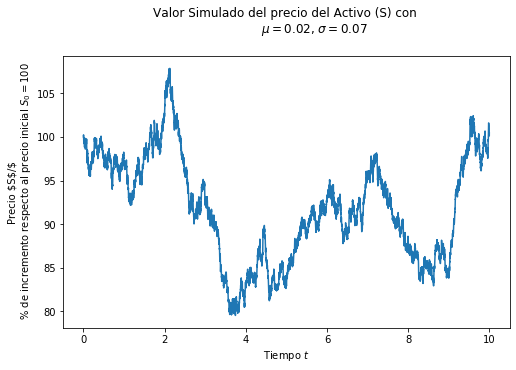

(array([0.000e+00, 1.000e-03, 2.000e-03, ..., 9.998e+00, 9.999e+00,
        1.000e+01]),
 array([100.        , 100.24523978, 100.21872879, ..., 100.16475906,
        100.11972553, 100.46219539]))

In [11]:
grafico_valor_activo(S0 = 100, mu = 0.02, sig = 0.07, dt = 0.001, Dt = 1, N = 10, graficar = True, pts = 0, txtad = "")

In [2]:
def est_precis(ddt, mmu = 0.9, Ene = 48):
    start = time.time()
    ts, Ss = grafico_valor_activo(S0 = 1, mu = mmu, sig = 0, dt = ddt, Dt = 3, N = Ene, graficar = False)
    t = ts[-1]
    exCalc = Ss[-1]
    exReal = np.exp(mmu*t)
    error = np.abs(exCalc/exReal - 1)
    print("Para dt =", ddt, ", e**(", mmu, t, ") calculado:\t", exCalc)
    print("Para dt =", ddt, ", e**(", mmu, t, ") real:\t", exReal)
    print("Asi que, para dt =", ddt, " hubo un error de:", error*100, "%")
    print("Tiempo: ", time.time() - start, "\n")
est_precis(ddt = 0.0001)
est_precis(ddt = 0.0005)
est_precis(ddt = 0.001)
est_precis(ddt = 0.01)

Para dt = 0.0001 , e**( 0.9 144.0 ) calculado:	 1.9143978647135023e+56
Para dt = 0.0001 , e**( 0.9 144.0 ) real:	 1.9255945791484567e+56
Asi que, para dt = 0.0001  hubo un error de: 0.5814679037944637 %
Tiempo:  10.732323408126831 

Para dt = 0.0005 , e**( 0.9 144.0 ) calculado:	 1.8702713688723112e+56
Para dt = 0.0005 , e**( 0.9 144.0 ) real:	 1.9255945791484567e+56
Asi que, para dt = 0.0005  hubo un error de: 2.8730455971999413 %
Tiempo:  2.2553927898406982 

Para dt = 0.001 , e**( 0.9 144.0 ) calculado:	 1.816569369920516e+56
Para dt = 0.001 , e**( 0.9 144.0 ) real:	 1.9255945791484567e+56
Asi que, para dt = 0.001  hubo un error de: 5.661898429115553 %
Tiempo:  1.14546537399292 

Para dt = 0.01 , e**( 0.9 144.0 ) calculado:	 1.0784345960075816e+56
Para dt = 0.01 , e**( 0.9 144.0 ) real:	 1.9255945791484567e+56
Asi que, para dt = 0.01  hubo un error de: 43.99472206218555 %
Tiempo:  0.10913729667663574 



# $\mu=0.031$

## $\sigma = 0$

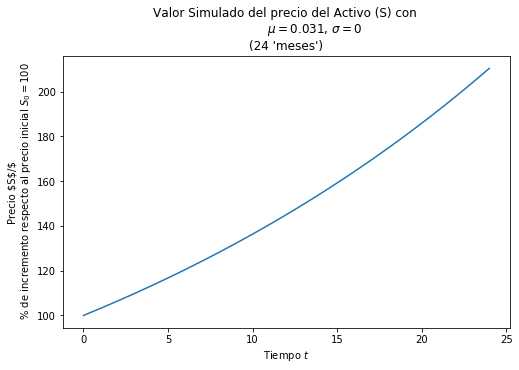

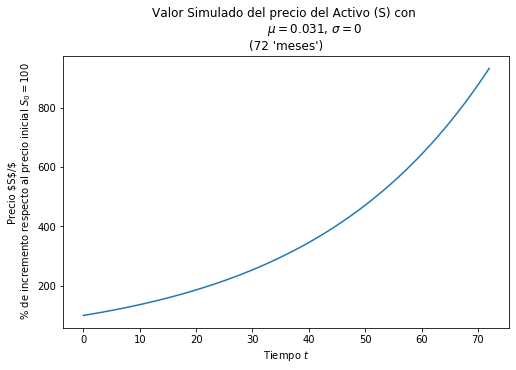

In [3]:
# Mes
_= grafico_valor_activo(mu = 0.031, sig = 0, Dt = 1, N = 24, txtad = "(24 'meses')") # mu y sigma de amazon de septiembre de 2017 a septiembre de 2019
_= grafico_valor_activo(mu = 0.031, sig = 0, Dt = 1, N = 24*3, txtad = "(72 'meses')")

## $\sigma = 0.03$

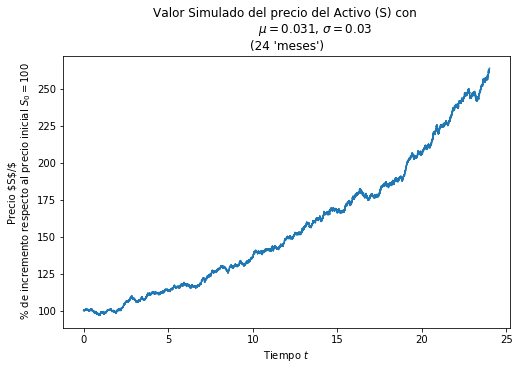

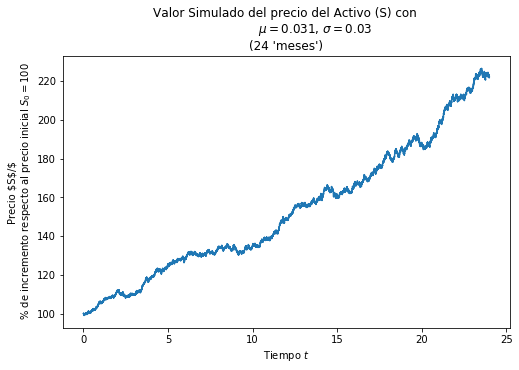

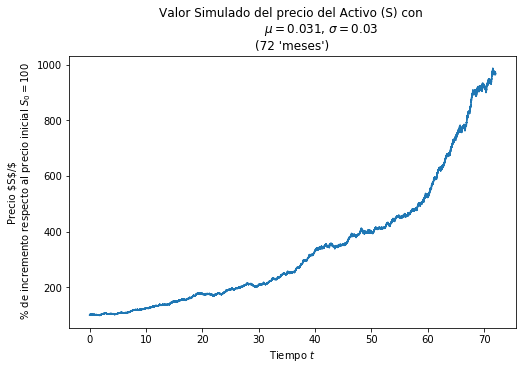

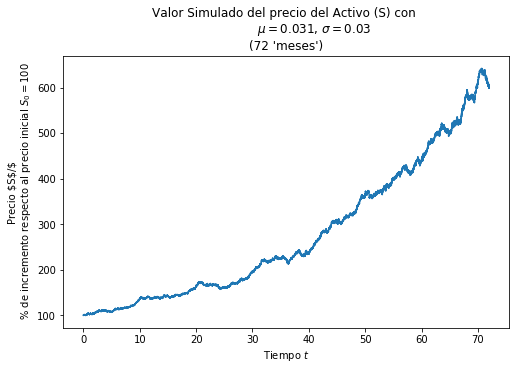

In [4]:
# Mes
_= grafico_valor_activo(mu = 0.031, sig = 0.03, Dt = 1, N = 24, txtad = "(24 'meses')") # mu y sigma de amazon de septiembre de 2017 a septiembre de 2019
_= grafico_valor_activo(mu = 0.031, sig = 0.03, Dt = 1, N = 24, txtad = "(24 'meses')")
_= grafico_valor_activo(mu = 0.031, sig = 0.03, Dt = 1, N = 24*3, txtad = "(72 'meses')")
_= grafico_valor_activo(mu = 0.031, sig = 0.03, Dt = 1, N = 24*3, txtad = "(72 'meses')")

## $\sigma = 0.09$

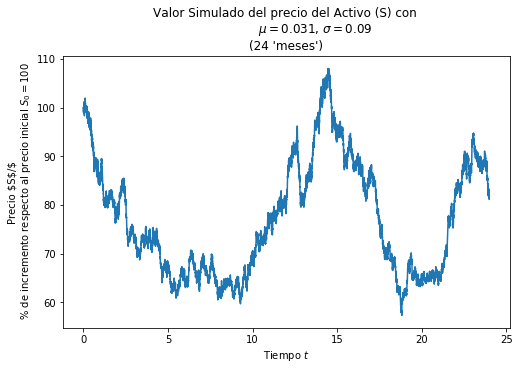

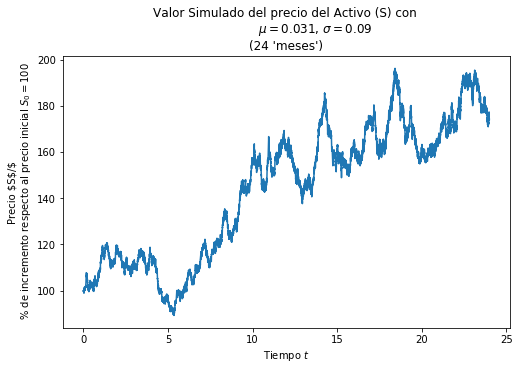

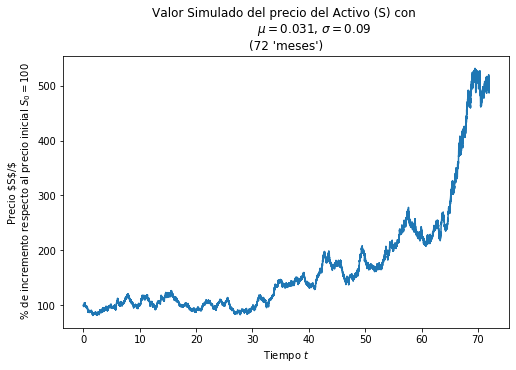

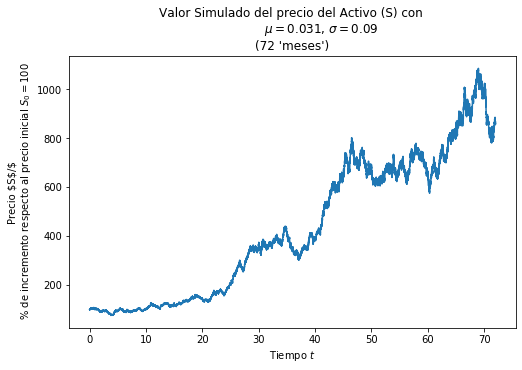

In [5]:
# Mes
# mu y sigma de amazon de septiembre de 2017 a septiembre de 2019
_= grafico_valor_activo(mu = 0.031, sig = 0.09, Dt = 1, N = 24, txtad = "(24 'meses')") 
_= grafico_valor_activo(mu = 0.031, sig = 0.09, Dt = 1, N = 24, txtad = "(24 'meses')")
_= grafico_valor_activo(mu = 0.031, sig = 0.09, Dt = 1, N = 24*3, txtad = "(72 'meses')")
_= grafico_valor_activo(mu = 0.031, sig = 0.09, Dt = 1, N = 24*3, txtad = "(72 'meses')")


## $\sigma = 0.15$

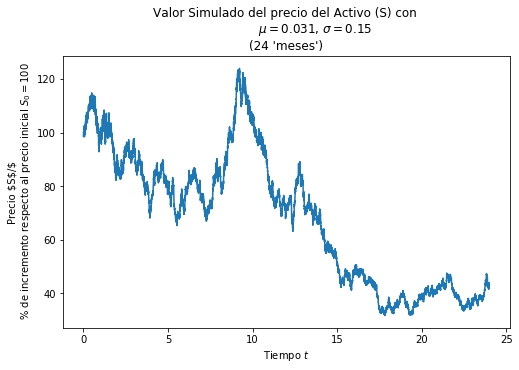

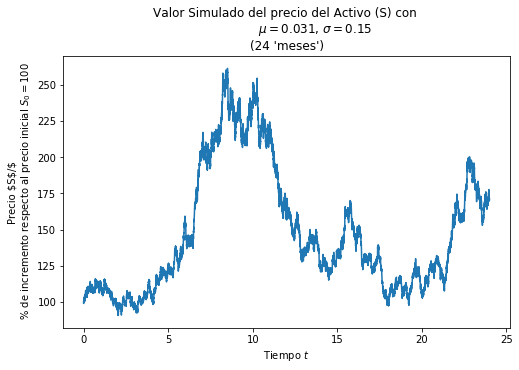

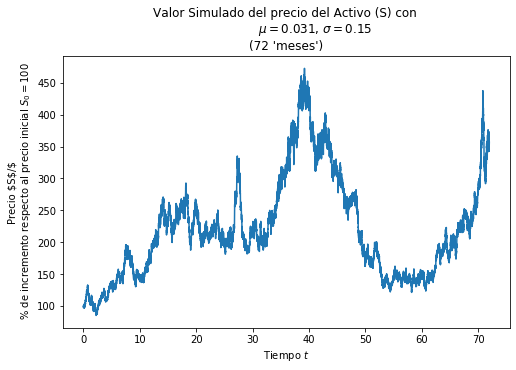

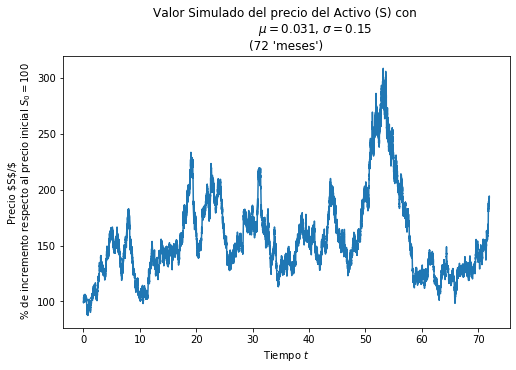

In [6]:
# Mes
_= grafico_valor_activo(mu = 0.031, sig = 0.15, Dt = 1, N = 24, txtad = "(24 'meses')") # mu y sigma de amazon de septiembre de 2017 a septiembre de 2019
_= grafico_valor_activo(mu = 0.031, sig = 0.15, Dt = 1, N = 24, txtad = "(24 'meses')")
_= grafico_valor_activo(mu = 0.031, sig = 0.15, Dt = 1, N = 24*3, txtad = "(72 'meses')")
_= grafico_valor_activo(mu = 0.031, sig = 0.15, Dt = 1, N = 24*3, txtad = "(72 'meses')")

## $\sigma = 0.4$

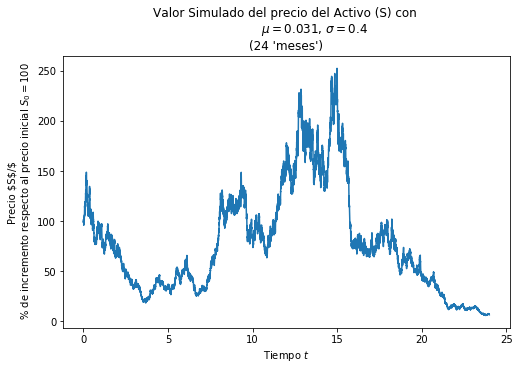

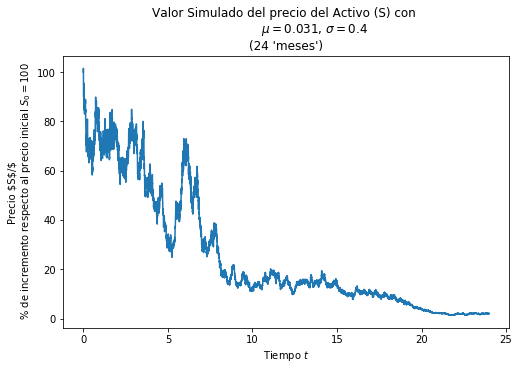

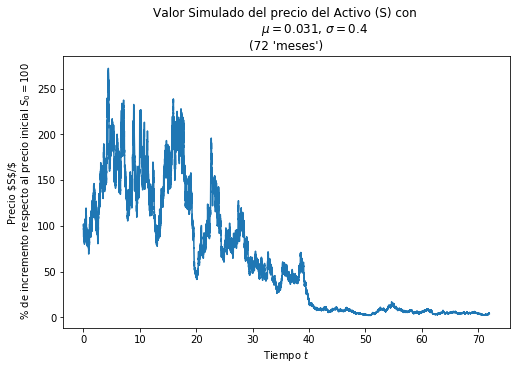

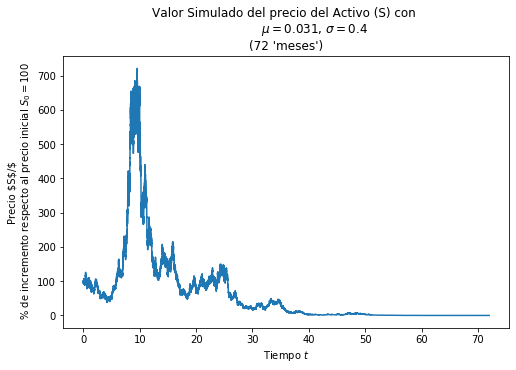

In [7]:
# Mes
_= grafico_valor_activo(mu = 0.031, sig = 0.4, Dt = 1, N = 24, txtad = "(24 'meses')") # mu y sigma de amazon de septiembre de 2017 a septiembre de 2019
_= grafico_valor_activo(mu = 0.031, sig = 0.4, Dt = 1, N = 24, txtad = "(24 'meses')")
_= grafico_valor_activo(mu = 0.031, sig = 0.4, Dt = 1, N = 24*3, txtad = "(72 'meses')")
_= grafico_valor_activo(mu = 0.031, sig = 0.4, Dt = 1, N = 24*3, txtad = "(72 'meses')")

## $\sigma = 1$

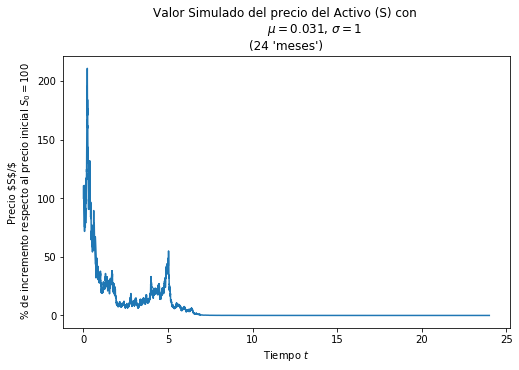

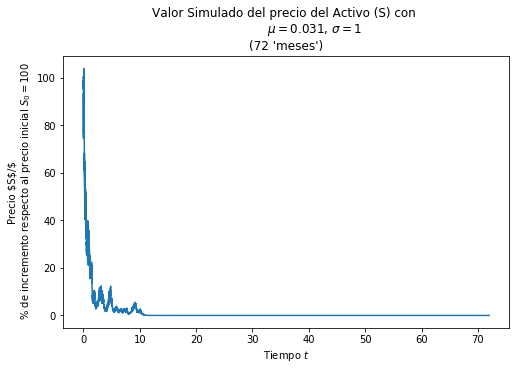

In [8]:
# Mes
_= grafico_valor_activo(mu = 0.031, sig = 1, Dt = 1, N = 24, txtad = "(24 'meses')") # mu y sigma de amazon de septiembre de 2017 a septiembre de 2019
_= grafico_valor_activo(mu = 0.031, sig = 1, Dt = 1, N = 24*3, txtad = "(72 'meses')")

# Otros $\mu$'s

In [20]:
def plot_texto(texto, taman):
    plt.figure(figsize = (3,1))
    plt.axis('off')
    plt.text(0, 0, texto, fontsize=taman)

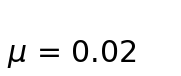

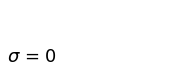

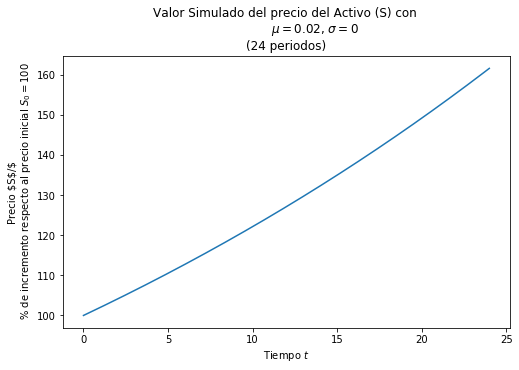

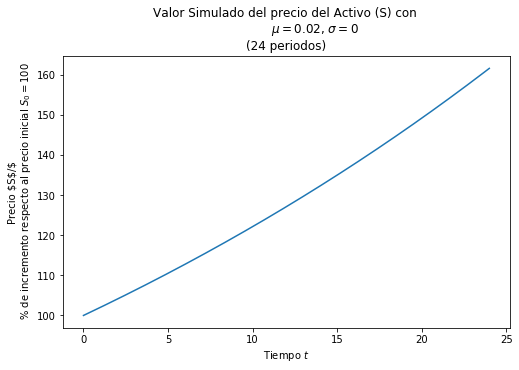

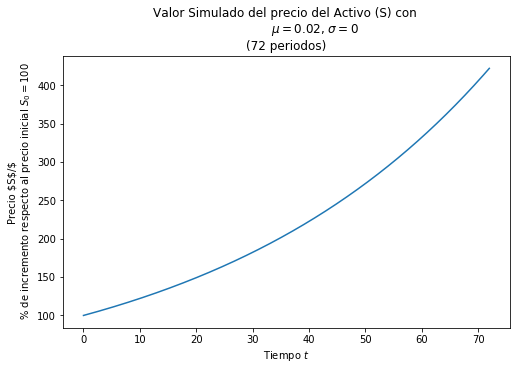

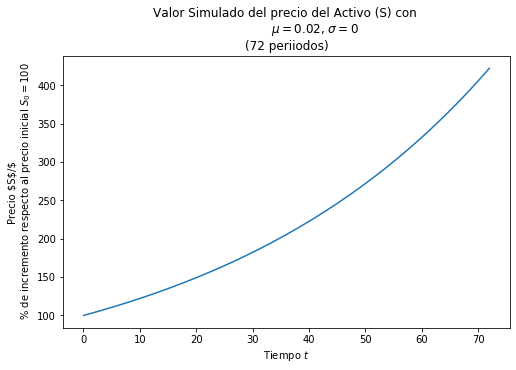

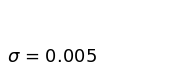

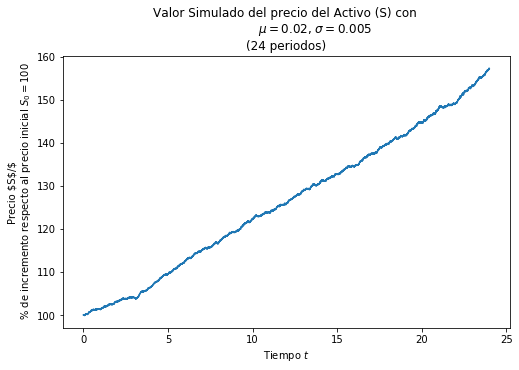

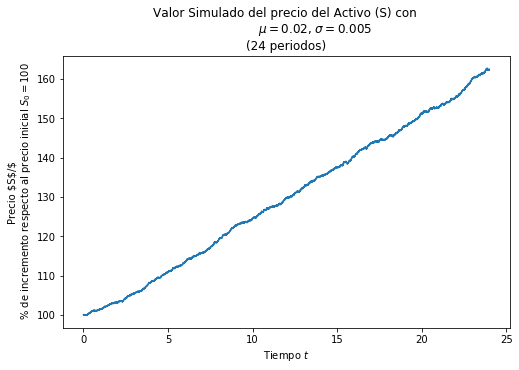

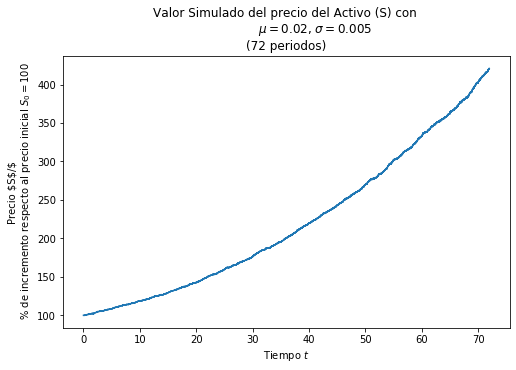

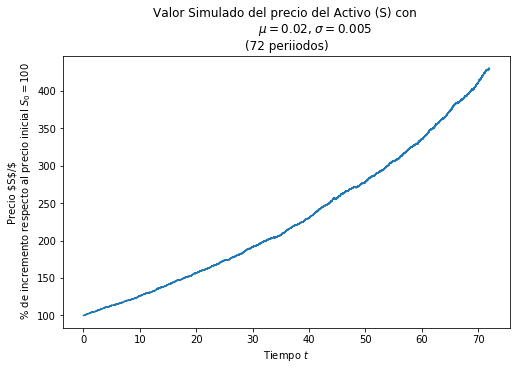

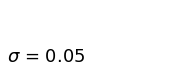

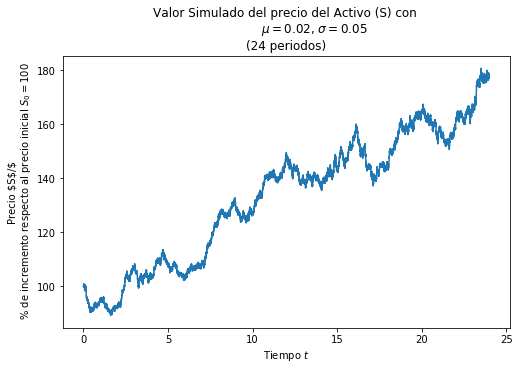

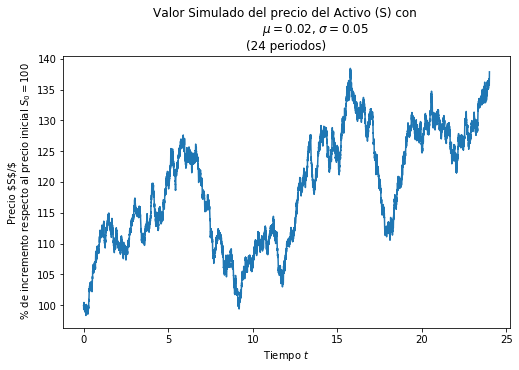

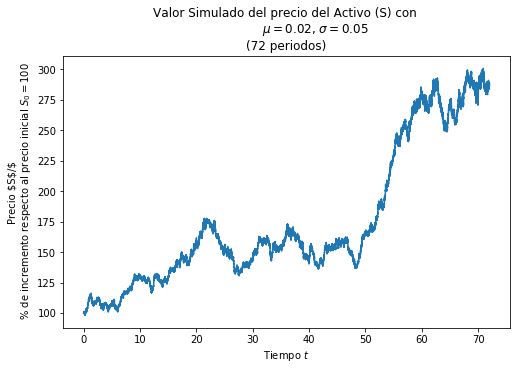

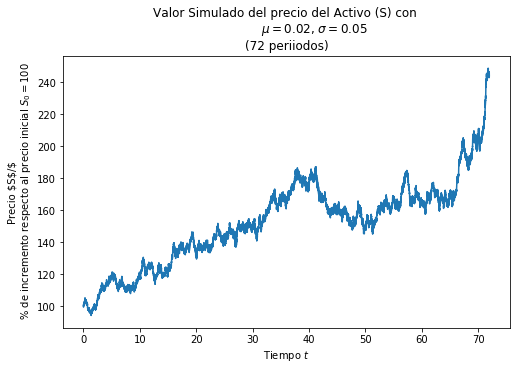

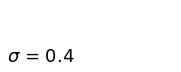

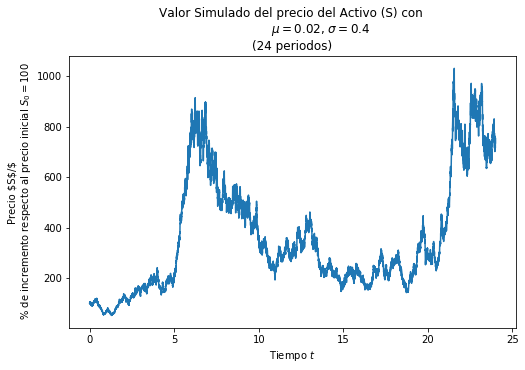

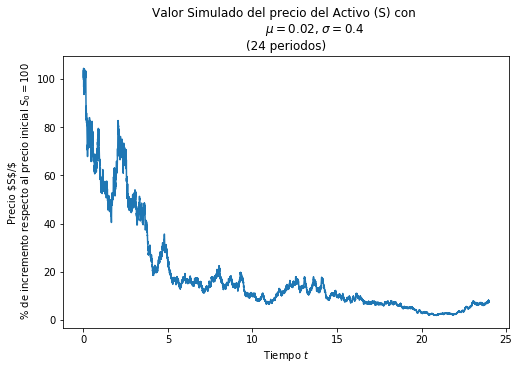

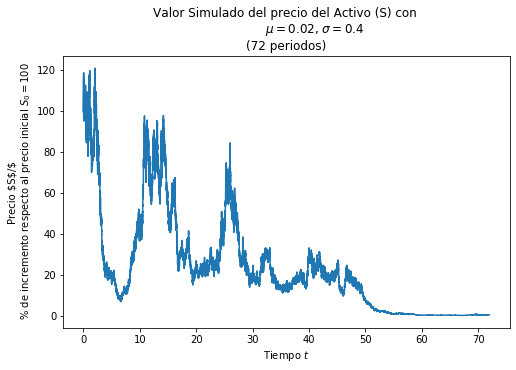

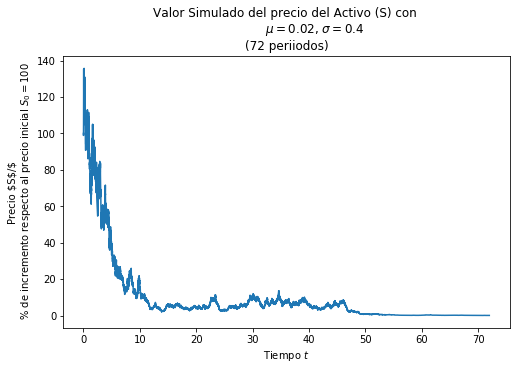

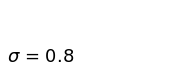

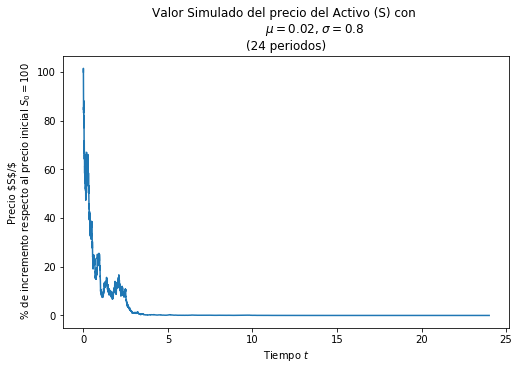

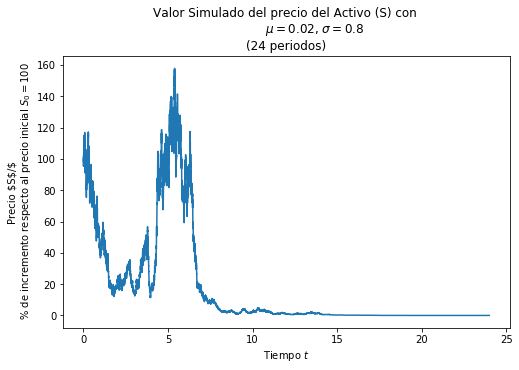

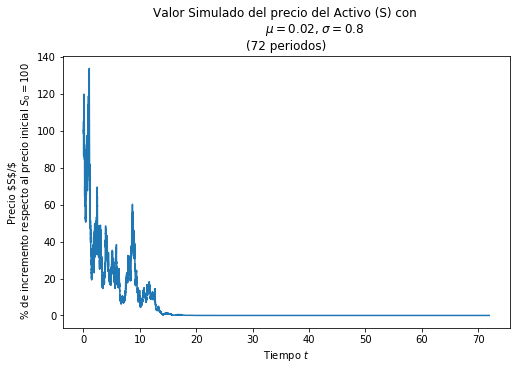

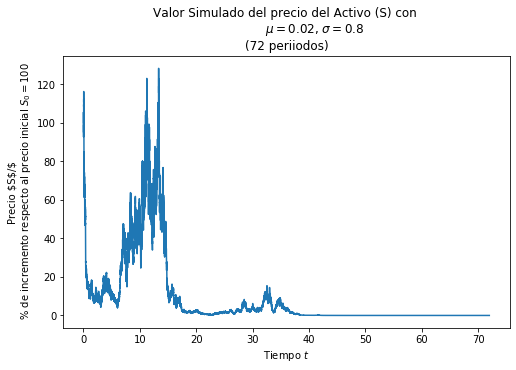

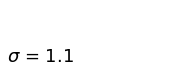

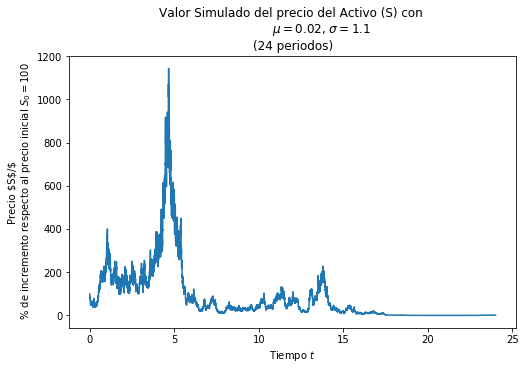

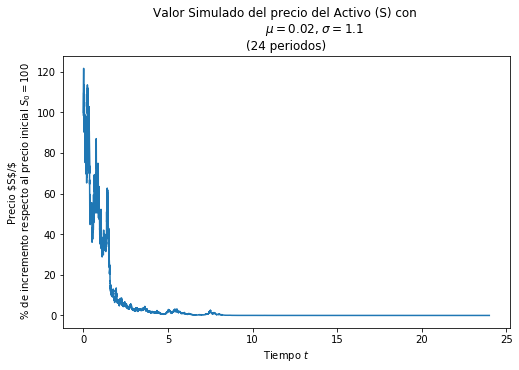

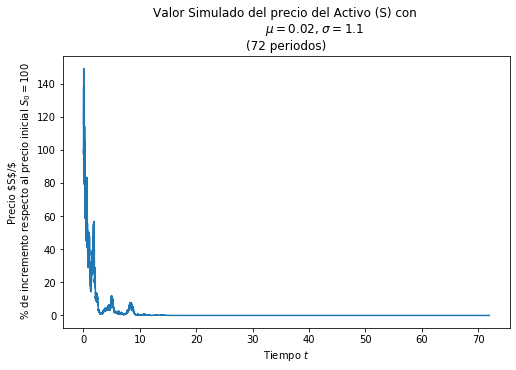

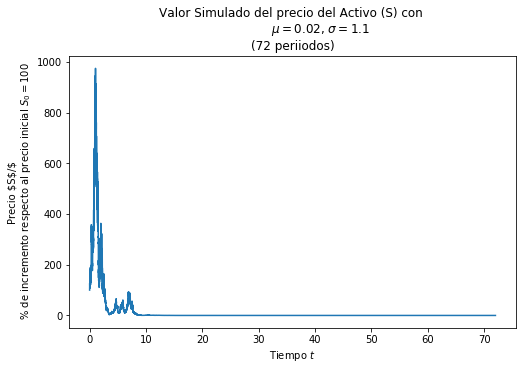

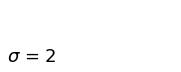

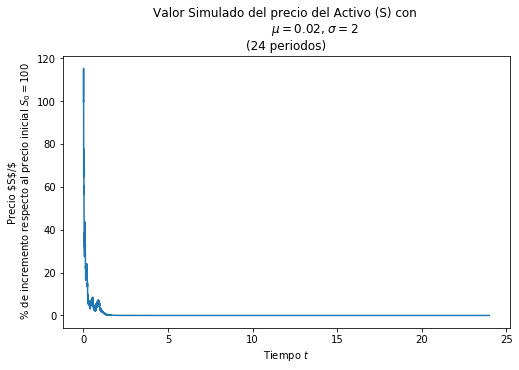

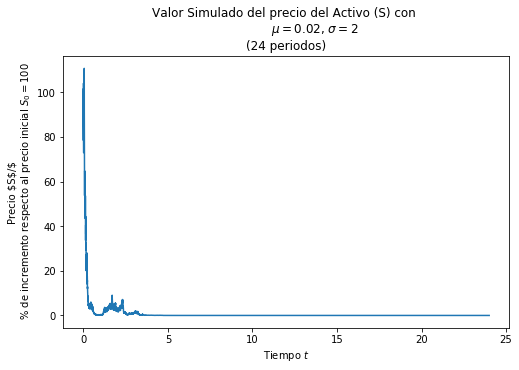

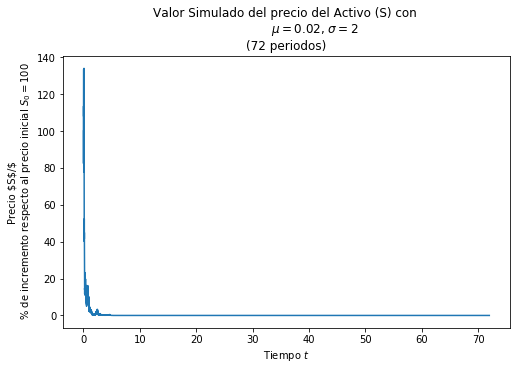

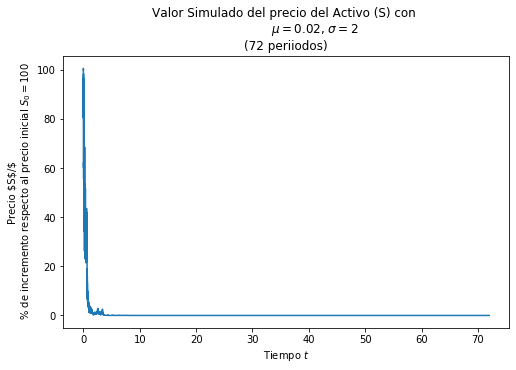

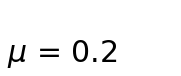

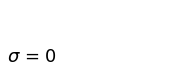

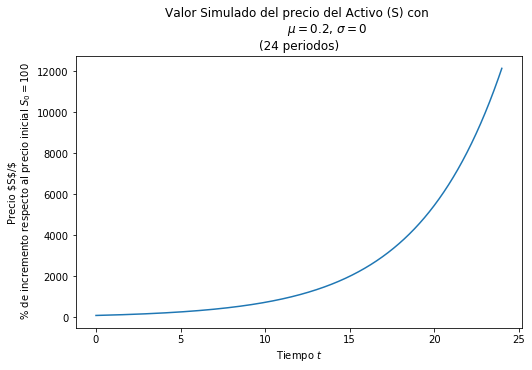

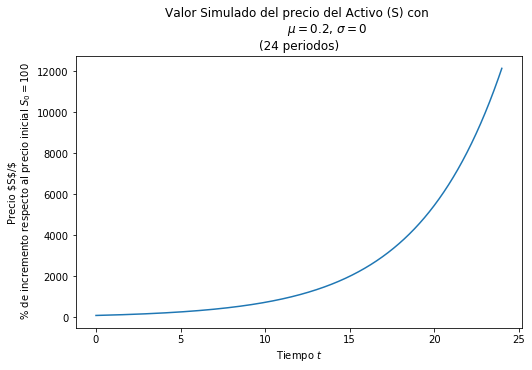

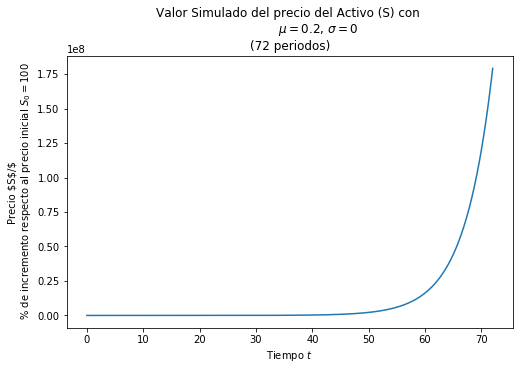

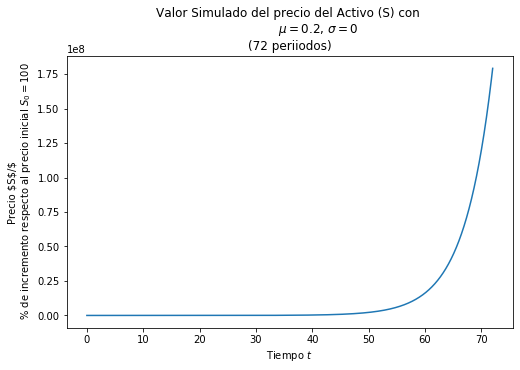

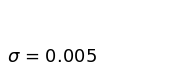

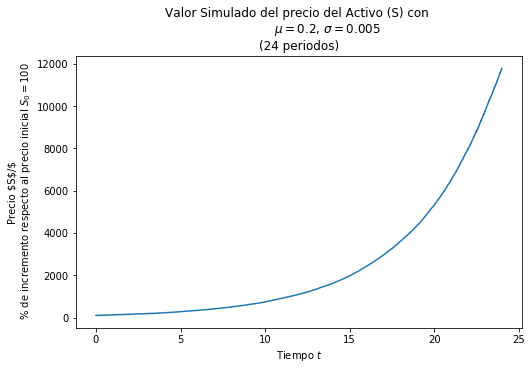

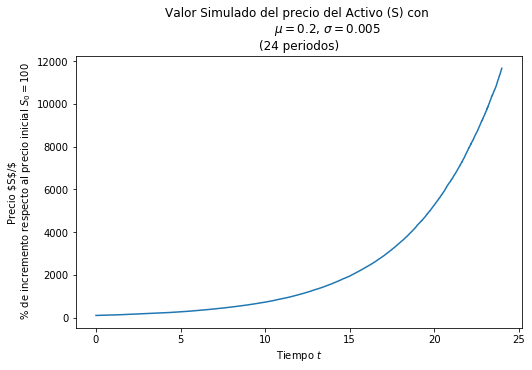

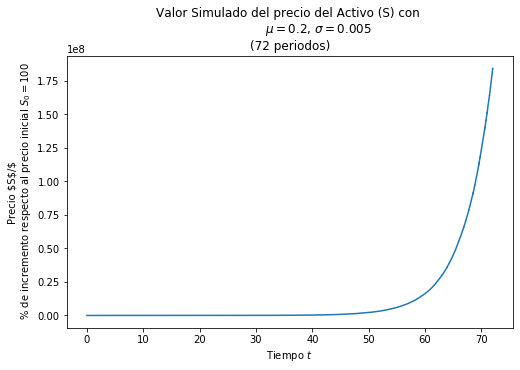

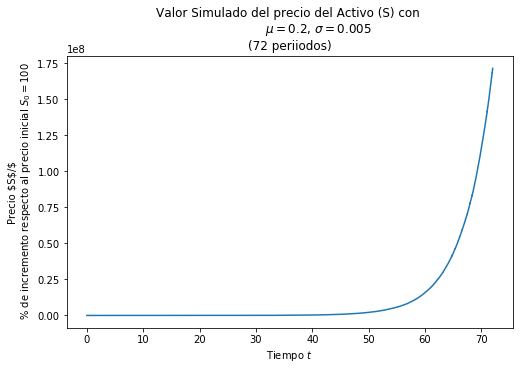

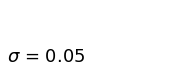

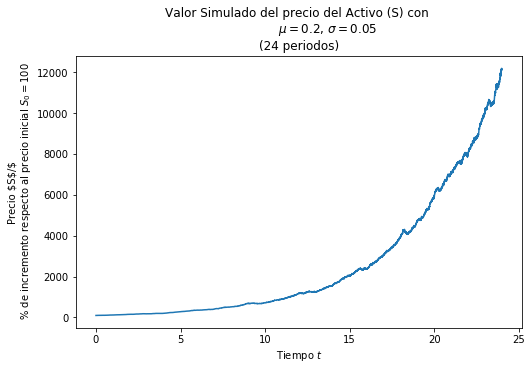

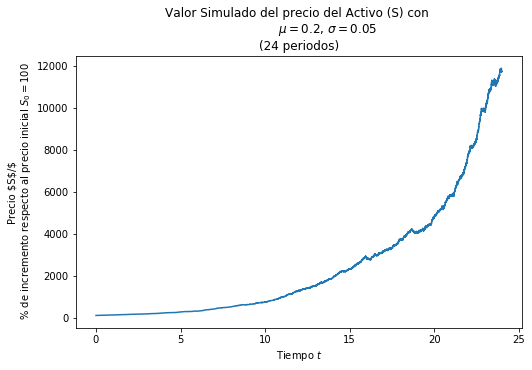

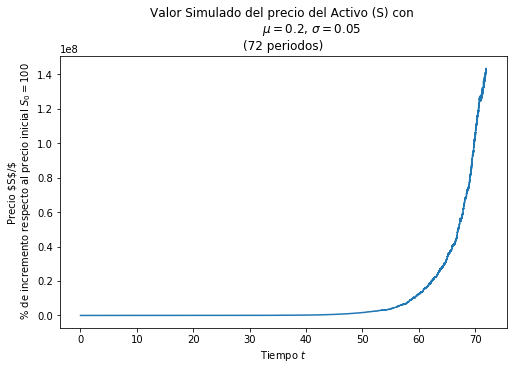

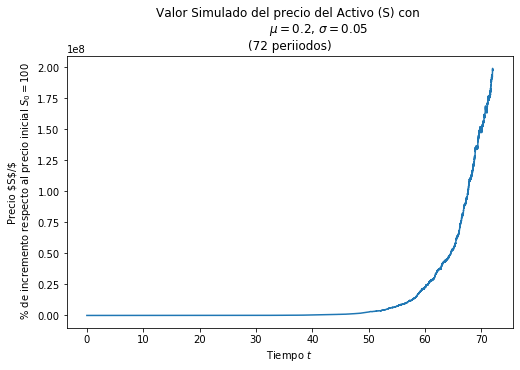

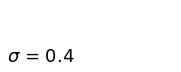

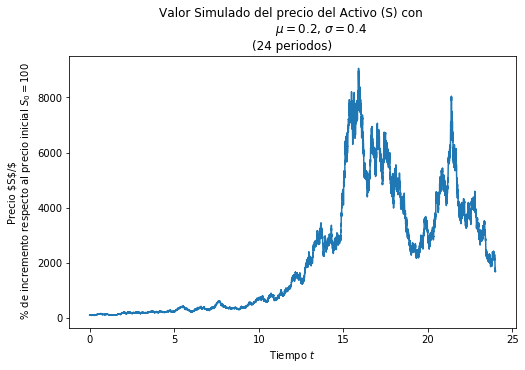

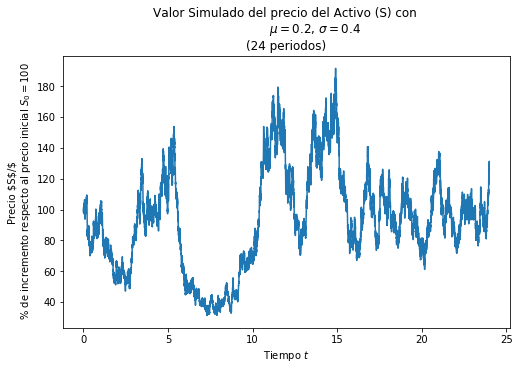

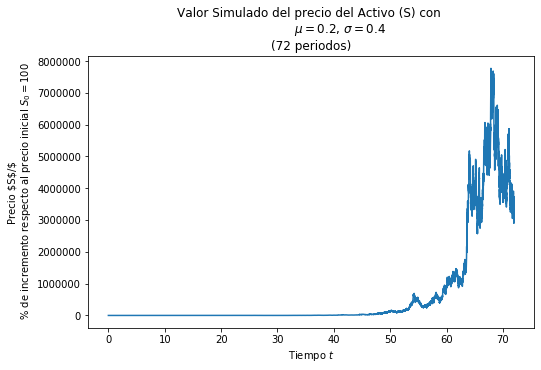

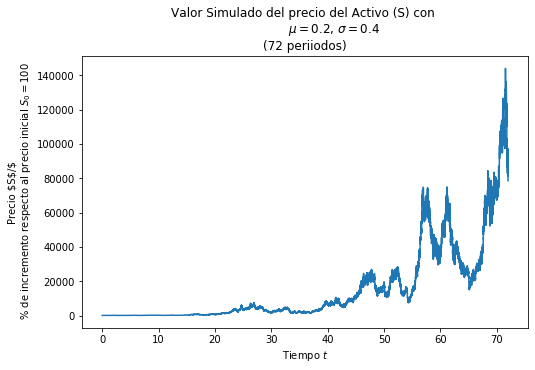

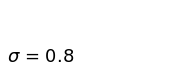

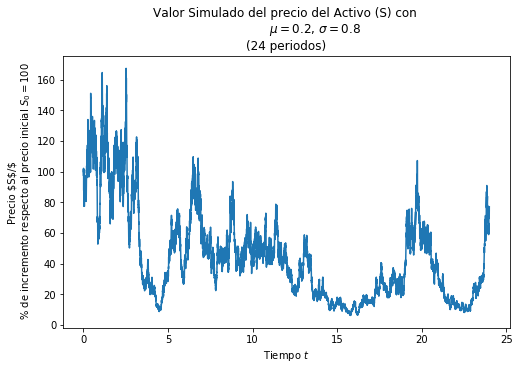

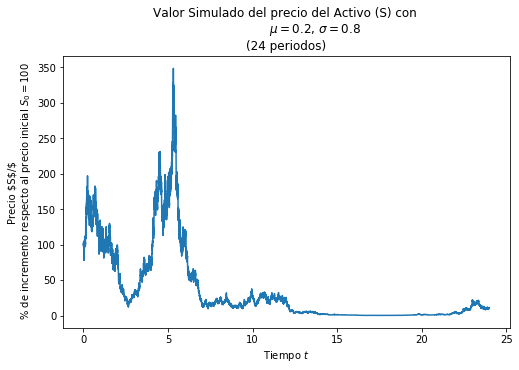

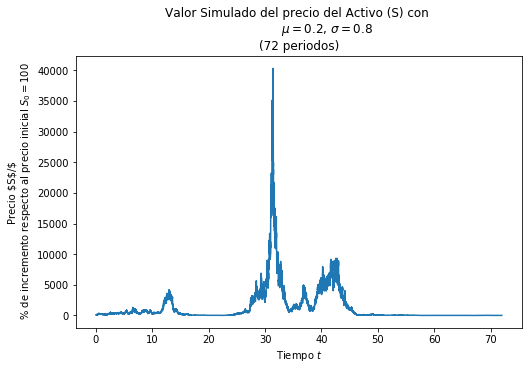

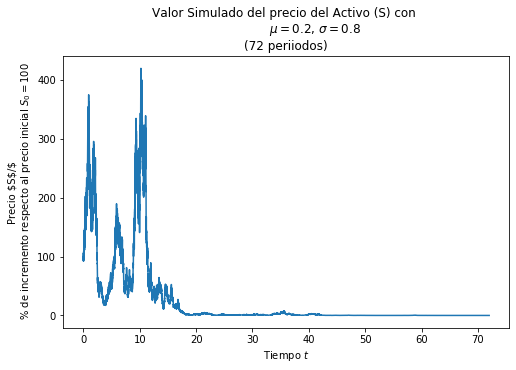

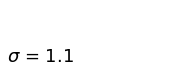

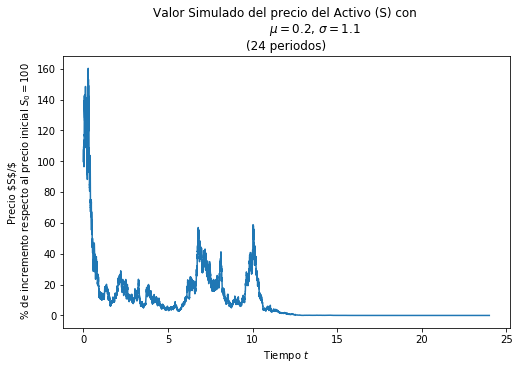

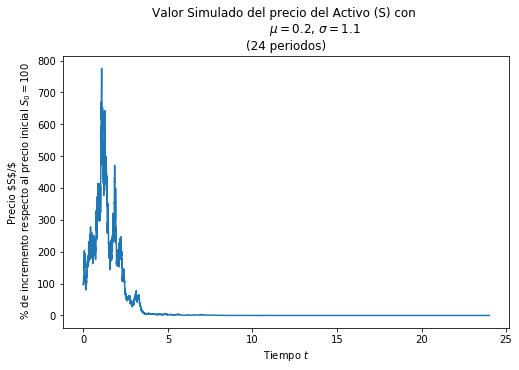

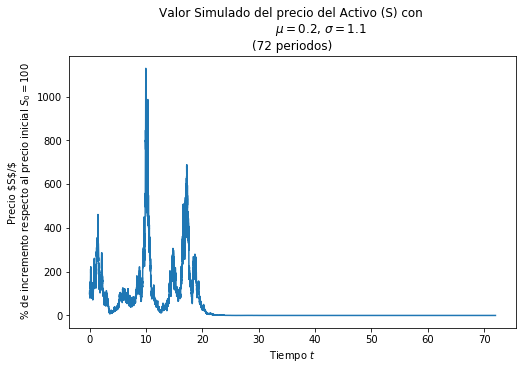

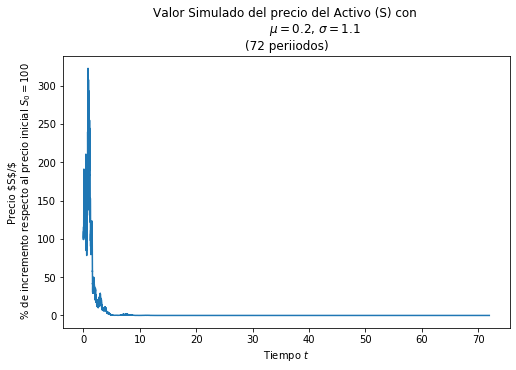

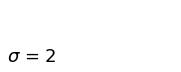

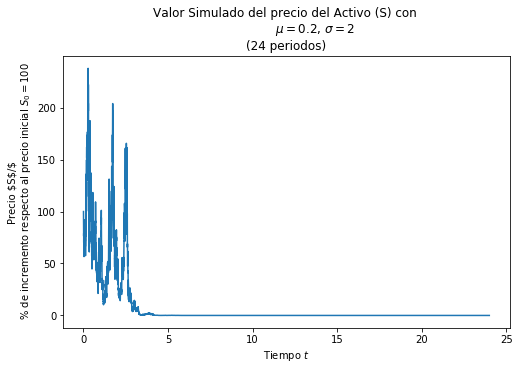

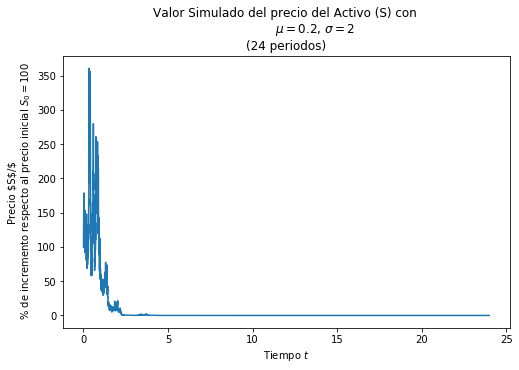

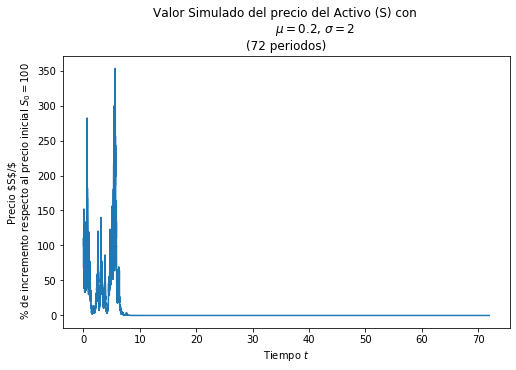

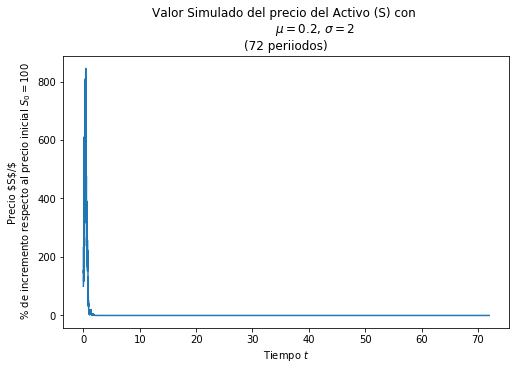

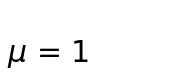

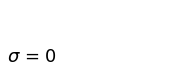

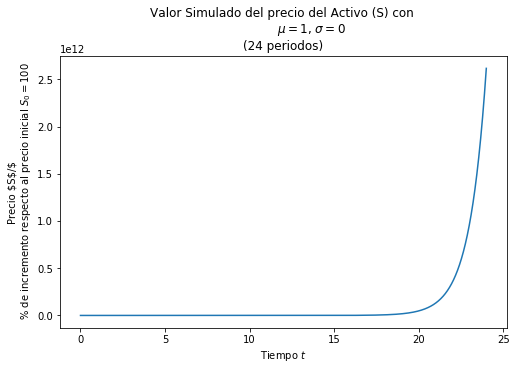

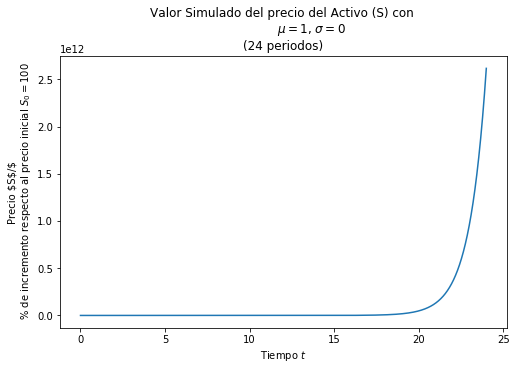

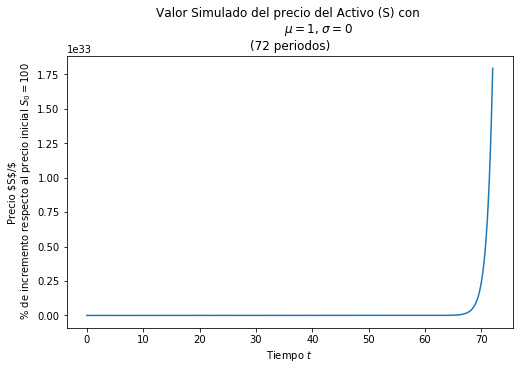

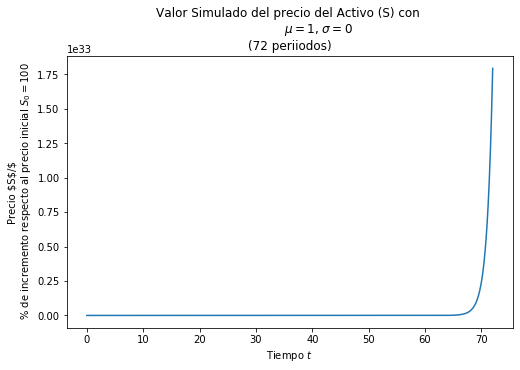

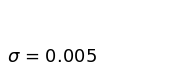

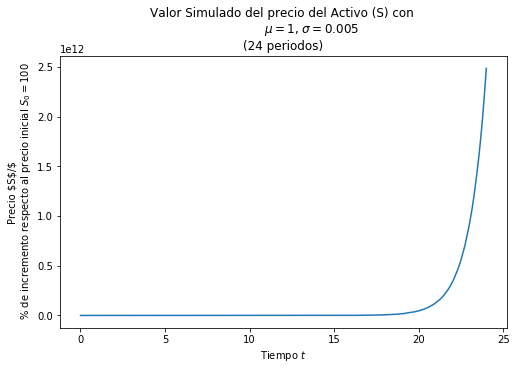

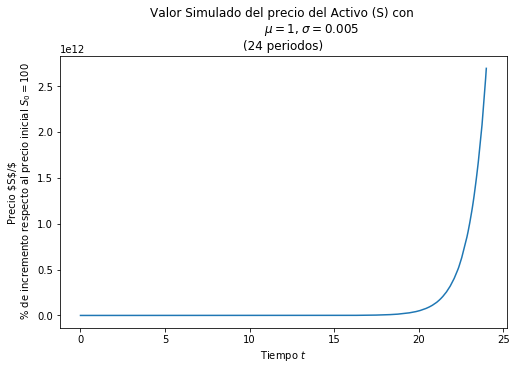

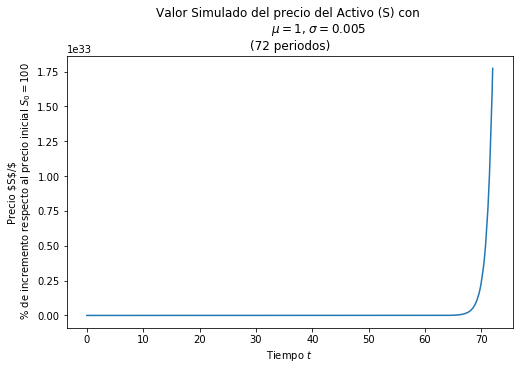

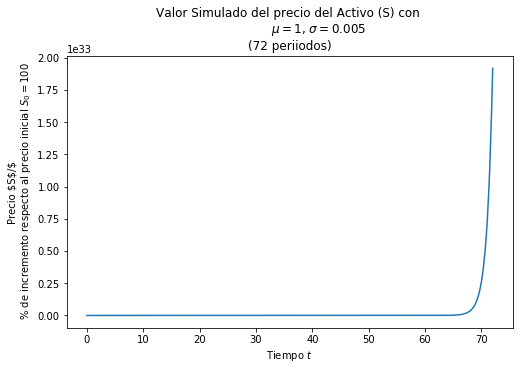

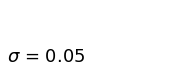

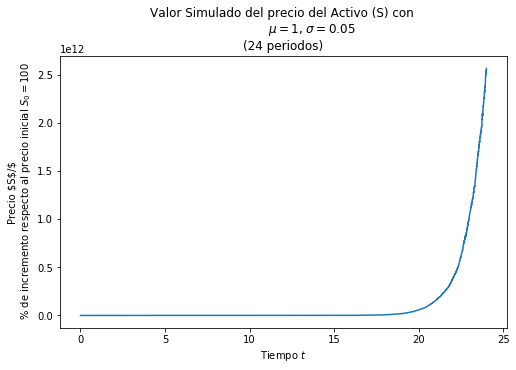

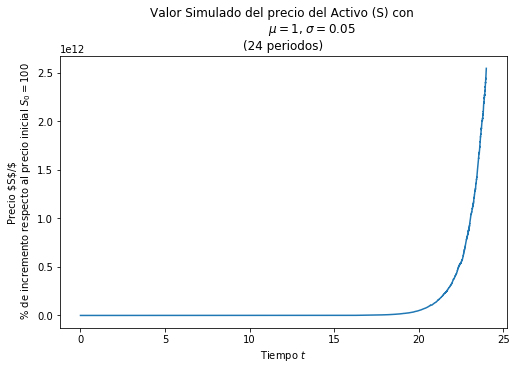

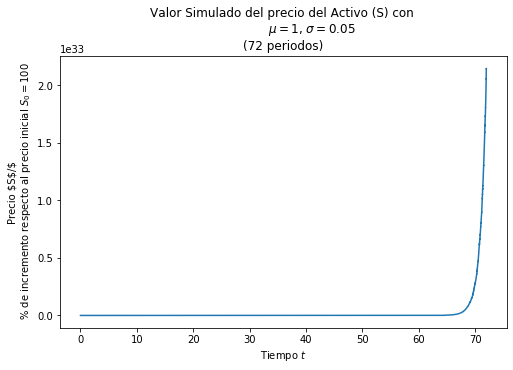

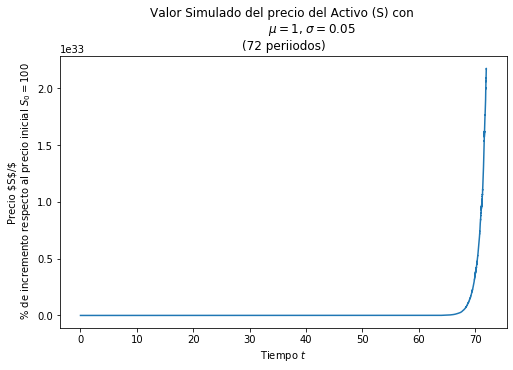

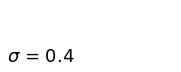

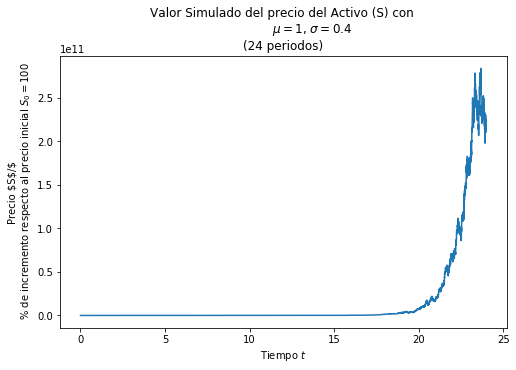

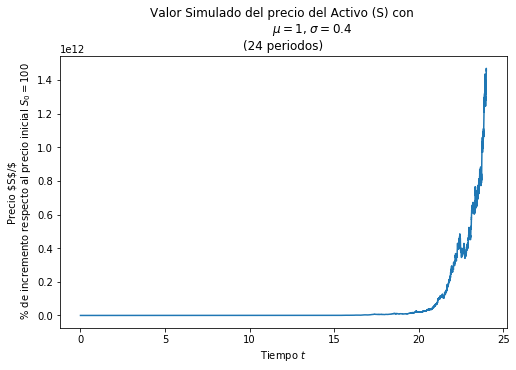

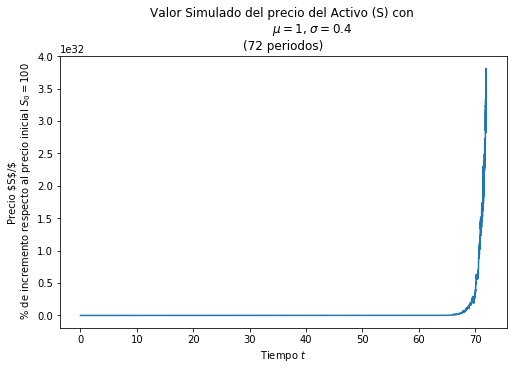

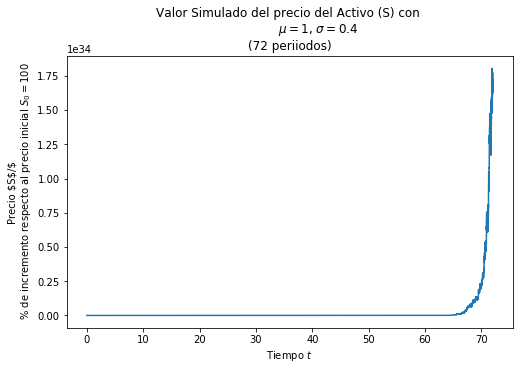

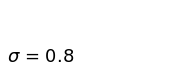

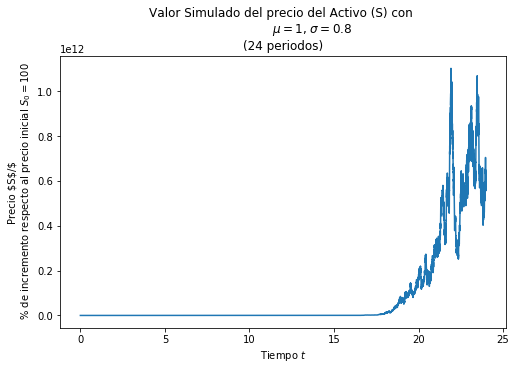

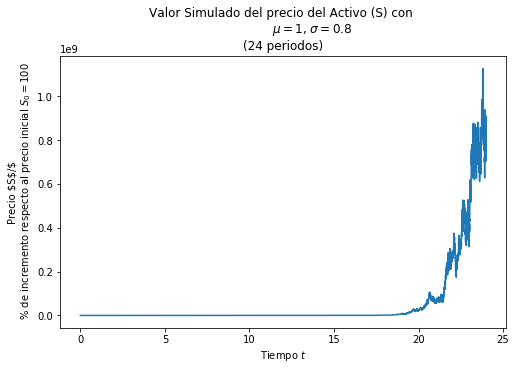

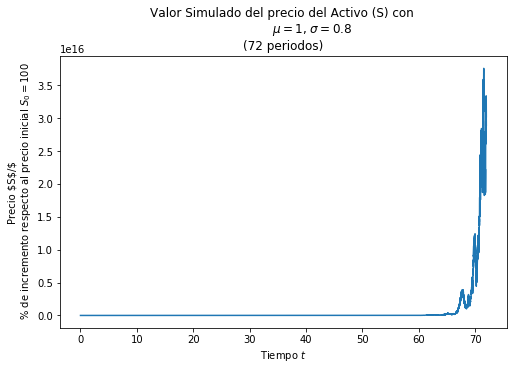

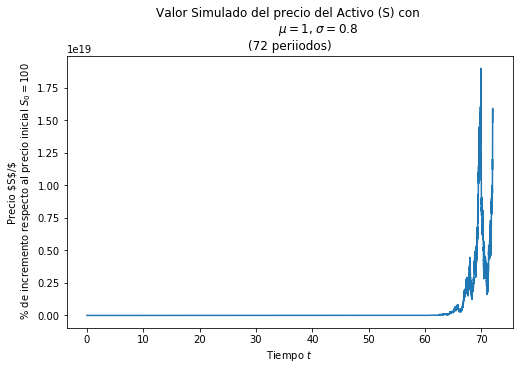

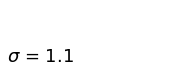

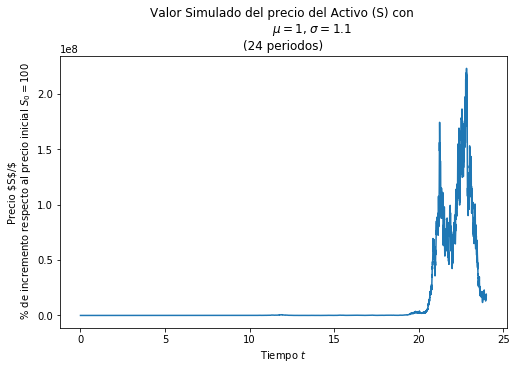

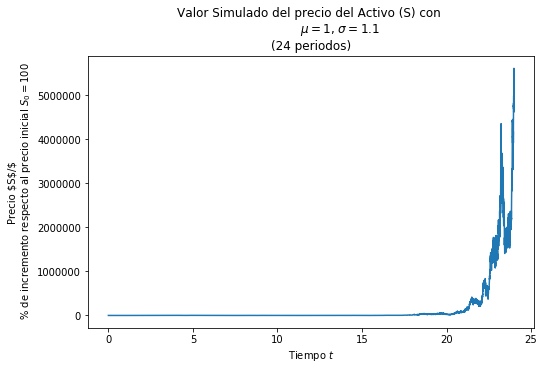

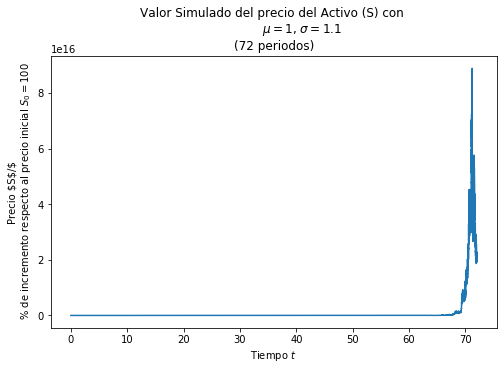

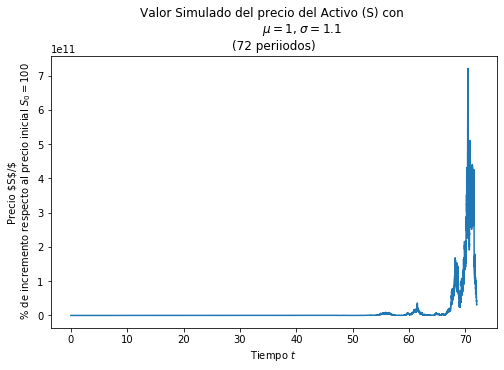

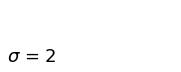

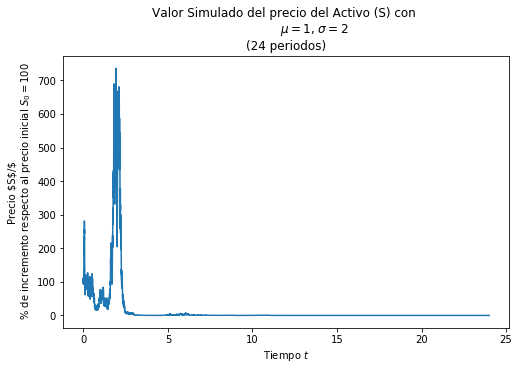

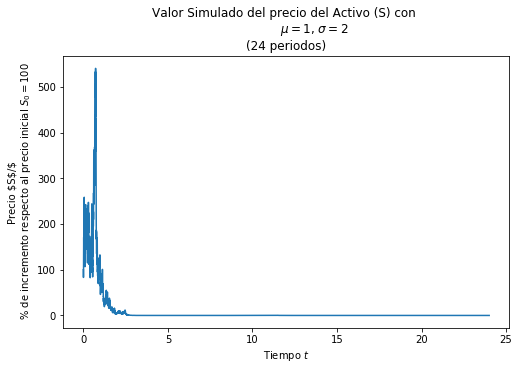

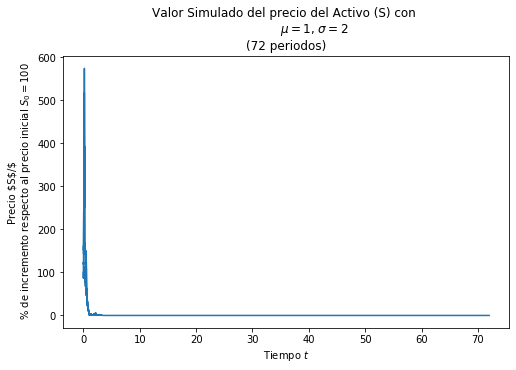

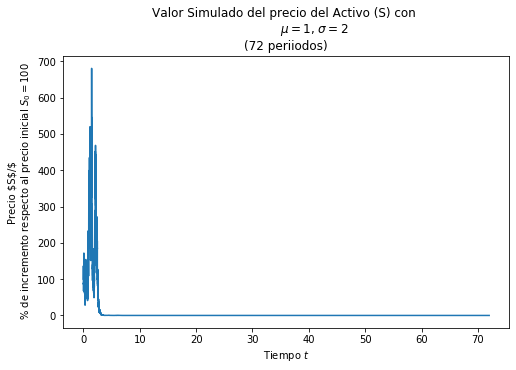

In [26]:
mus = [0.02, 0.2, 1]
sigs = [0, 0.005, 0.05, 0.4, 0.8, 1.1, 2]

for mmu in mus:
    plot_texto("$\mu$ = " + str(mmu), 30)
    
    for ssig in sigs:
        plot_texto("$\sigma$ = " + str(ssig), 18)
        _= grafico_valor_activo(mu = mmu, sig = ssig, Dt = 1, N = 24, txtad = "(24 periodos)") # mu y sigma de amazon de septiembre de 2017 a septiembre de 2019
        _= grafico_valor_activo(mu = mmu, sig = ssig, Dt = 1, N = 24, txtad = "(24 periodos)")
        _= grafico_valor_activo(mu = mmu, sig = ssig, Dt = 1, N = 24*3, txtad = "(72 periodos)")
        _= grafico_valor_activo(mu = mmu, sig = ssig, Dt = 1, N = 24*3, txtad = "(72 periiodos)")